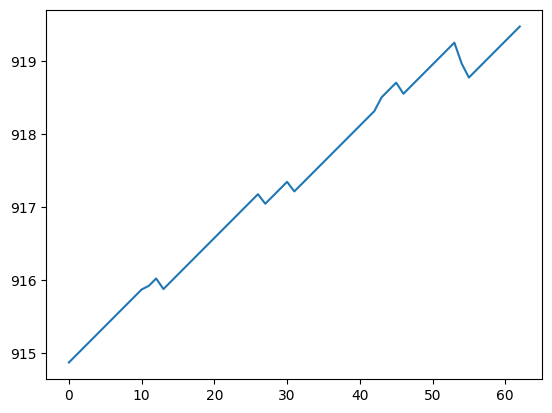

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from utils import smooth_ma, deriv
q = open("data.json")
f = json.load(q)
q.close()



y = np.array(f['y'])[:200]



dy = np.array(f['dy'])[:30]
dy = smooth_ma(dy)
dy[dy<=0] = -0.00001
dy[dy>0] = 0.00001
# plt.plot(dy[4:],label='smooth_dy')


ddy = np.array(f['ddy'])[:30]
ddy = smooth_ma(ddy)
ddy[ddy<=0] = -0.00001
ddy[ddy>0] = 0.00001
# plt.plot(ddy[4:],label='smooth_ddy')


# dy = smooth_ma(np.array(f['dy'])[:30] * 20) 

ddy = np.array(f['ddy'])[:30]
# ddy = smooth_ma(np.array(f['ddy'])[:30]* 20)

buy = f['bought'][1:10]
tbuy = f['tbought'][1:10]
sell = f['sold'][1:10]
tsell = f['tsold'][1:10]
bal = f['bal']
bal = np.array(bal)


plt.plot(bal)

# y -= y.mean()
# y /= 10
# plt.plot(y[4:],label='y')
# plt.plot((dy + y.mean())[8:15],label='dy')
# plt.plot((ddy + y.mean())[8:15],label='ddy')

# plt.plot(dy[4:],label='dy')
# plt.plot((ddy)[8:15],label='ddy')
# s = 0
# e = 9
# plt.scatter(tbuy[s:e],buy[s:e], label='buy')
# plt.scatter(tsell[s:e],sell[s:e], label='sell')
# plt.legend()


In [1]:
from forex_old import ForexApi

env = ForexApi()
d = env.view(_pair="AUDCAD")


In [12]:
pl = d['unrealizedPL']
float(pl)

0.8113

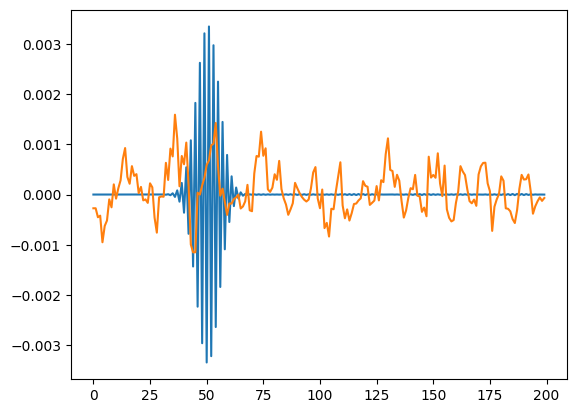

In [51]:
n = 100
darr = deriv(smooth_ma(y.copy()))
varr = darr
for i in range(n):
    varr = varr - darr
    darr = deriv(darr)

varr /= np.linalg.norm(varr)
varr /= 100
plt.plot(varr)
tarr = y
plt.plot(deriv(y) * 10)


